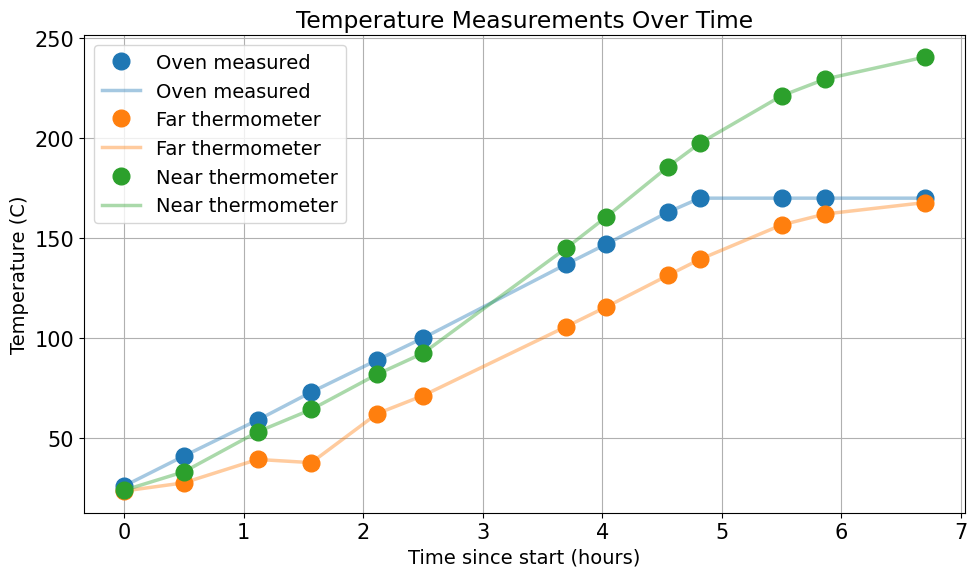

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from edes.utils.plotting import plot_dot_dashed, big_plt_font

big_plt_font()

# Define the data
data = {
    "Time": [
        "3:30PM", "4:00PM", "4:37PM", "5:04PM", "5:37PM", "6:00PM",
        "7:12PM", "7:32PM", "8:03PM", "8:19PM", "9:00PM", "9:22PM", "10:12PM"
    ],
    # "Setting (C)": [26, 41, 59, 73, 89, 100, 137, 147, 163, 170, 170, 170, 170],
    "Oven measured": [26, 41, 59, 73, 89, 100, 137, 147, 163, 170, 170, 170, 170],
    "Far thermometer": [23.5, 27.6, 39.3, 37.7, 62.2, 71.2, 105.8, 115.6, 131.4, 139.4, 156.6, 162.1, 167.8],
    "Near thermometer": [23.9, 33.1, 53.1, 64.3, 81.9, 92.4, 145.1, 160.6, 185.7, 197.5, 221.2, 229.6, 240.6]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Convert Time to datetime (assumes same date, any placeholder date works)
df['Time_full'] = pd.to_datetime(df['Time'], format='%I:%M%p')

# Calculate time since start in hours
start_time = df['Time_full'].iloc[0]
df['Time_since_start_hr'] = (df['Time_full'] - start_time).dt.total_seconds() / 3600

# Plot
plt.figure(figsize=(10, 6))
for col in df.columns[1:-2]:  # exclude 'Time', 'Time_full', and new column
    # p1 = plt.plot(df['Time_since_start_hr'], df[col], 'o', label=col)[0]
    # plt.plot(df['Time_since_start_hr'], df[col], color=p1.get_color(), alpha=0.4, linewidth=3)
    plot_dot_dashed(df['Time_since_start_hr'], df[col], label=col)

plt.xlabel("Time since start (hours)")
plt.ylabel("Temperature (C)")
plt.title("Temperature Measurements Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
